In [17]:
# Import libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import tkinter as tk
from tkinter import filedialog

print(f"TensorFlow version: {tf.__version__}")

# Check dataset
dataset_path = './Dataset'
if os.path.exists(dataset_path):
    classes = os.listdir(dataset_path)
    print(f"Dataset found with classes: {classes}")
else:
    print("Dataset not found!")

TensorFlow version: 2.18.0
Dataset found with classes: ['Anthurm', 'Rose', 'Sunflower']


In [18]:
# Data preparation
train_dir = './Dataset'
img_size = (64, 64)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 120 images belonging to 3 classes.


Found 30 images belonging to 3 classes.


In [19]:
# Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model built successfully")

Model built successfully


In [20]:
# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100
print(f"Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Validation Accuracy: {final_val_accuracy:.2f}%")

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.4317 - loss: 1.2146 - val_accuracy: 0.3333 - val_loss: 1.1109
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.5285 - loss: 0.9687 - val_accuracy: 0.6000 - val_loss: 0.8867
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.6916 - loss: 0.7087 - val_accuracy: 0.7667 - val_loss: 0.6452
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.7350 - loss: 0.5006 - val_accuracy: 0.7333 - val_loss: 0.4960
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - accuracy: 0.9067 - loss: 0.3313 - val_accuracy: 0.8333 - val_loss: 0.4080
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - accuracy: 0.9316 - loss: 0.2350 - val_accuracy: 0.8333 - val_loss: 0.3309
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 0.9310 - loss: 0.2055 - val_accuracy: 0.9000 - val_loss: 0.3310
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.9700 - loss: 0.1619 - val_accuracy: 0.9333 - val_loss:

In [21]:
# Save model and get class names
model.save('flower_classifier_model.h5')
class_names = list(train_generator.class_indices.keys())
print(f"Model saved. Classes: {class_names}")

Model saved. Classes: ['Anthurm', 'Rose', 'Sunflower']


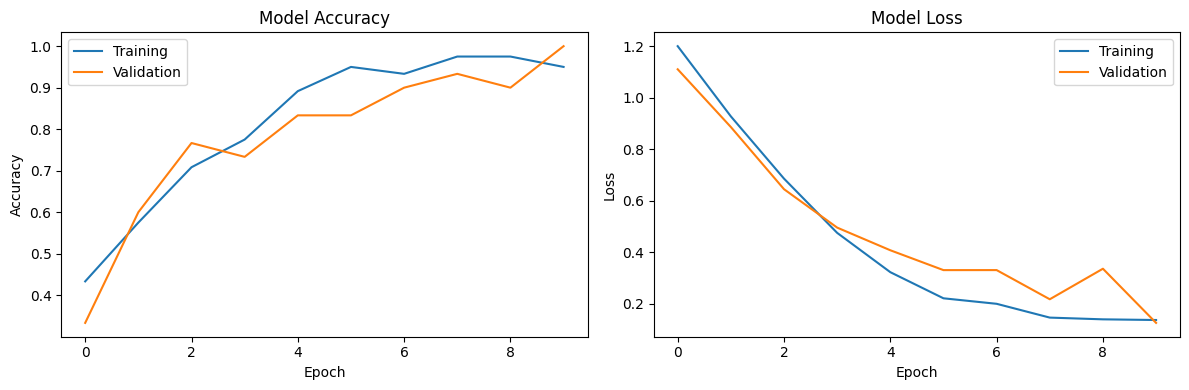

In [22]:
# Plot training results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Image selection and prediction function
def select_and_predict_image():
    try:
        root = tk.Tk()
        root.withdraw()
        root.attributes('-topmost', True)
        
        print("Opening file dialog...")
        img_path = filedialog.askopenfilename(
            title="Select a flower image",
            filetypes=[
                ("Image files", "*.jpg *.jpeg *.png *.bmp *.gif"),
                ("JPEG files", "*.jpg *.jpeg"),
                ("PNG files", "*.png"),
                ("All files", "*.*")
            ]
        )
        
        if img_path:
            print(f"Selected: {os.path.basename(img_path)}")
            
            # Load and preprocess image
            img = image.load_img(img_path, target_size=img_size)
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            
            # Make prediction
            print("Making prediction...")
            prediction = model.predict(img_array, verbose=0)
            predicted_class = class_names[np.argmax(prediction)]
            confidence = np.max(prediction) * 100
            
            # Display results
            plt.figure(figsize=(12, 5))
            
            # Show image
            plt.subplot(1, 2, 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Selected Image\\nPredicted: {predicted_class}\\nConfidence: {confidence:.1f}%', fontsize=12)
            
            # Show probabilities
            plt.subplot(1, 2, 2)
            probabilities = prediction[0] * 100
            colors = ['green' if i == np.argmax(prediction) else 'lightblue' for i in range(len(class_names))]
            bars = plt.bar(class_names, probabilities, color=colors)
            plt.ylabel('Confidence (%)')
            plt.title('Prediction Confidence')
            plt.ylim(0, 100)
            
            for bar, prob in zip(bars, probabilities):
                plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
                        f'{prob:.1f}%', ha='center', va='bottom', fontweight='bold')
            
            plt.tight_layout()
            plt.show()
            
            print(f"\\nResult: {predicted_class} ({confidence:.1f}% confidence)")
            print("All probabilities:")
            for i, class_name in enumerate(class_names):
                print(f"  {class_name}: {probabilities[i]:.1f}%")
                
        else:
            print("No image selected")
            
    except Exception as e:
        print(f"Error: {str(e)}")
        print("Make sure you have run all previous cells first!")
    finally:
        try:
            root.destroy()
        except:
            pass

print("Image selection function ready")

Image selection function ready


Opening file dialog...
Selected: sunflower-2511961_1920.jpg
Making prediction...


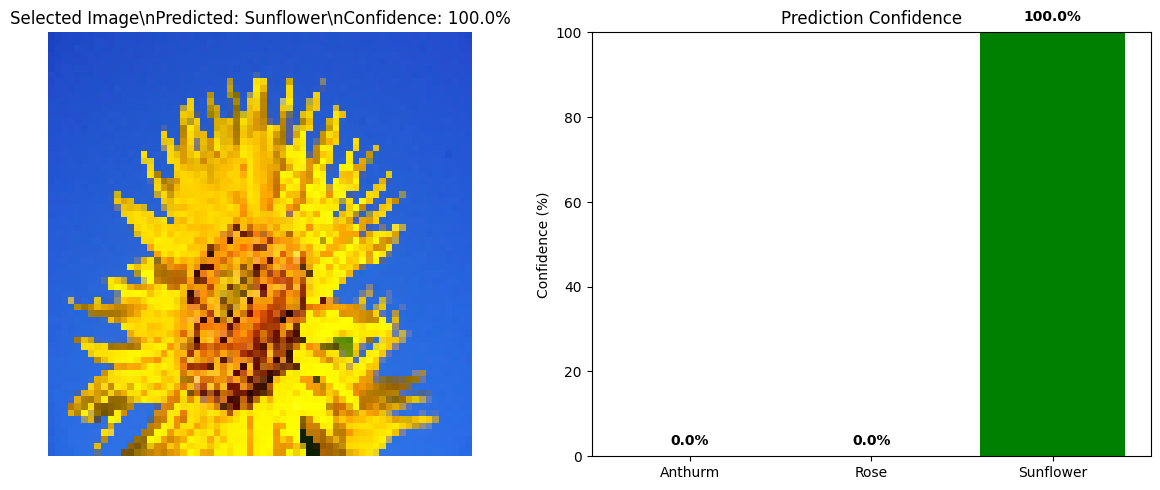

\nResult: Sunflower (100.0% confidence)
All probabilities:
  Anthurm: 0.0%
  Rose: 0.0%
  Sunflower: 100.0%


In [24]:
# Test with your own image
# Run this cell to open file dialog and select your image
try:
    select_and_predict_image()
except NameError:
    print("❌ Please run all previous cells first!")
    print("💡 Make sure you have trained the model before testing.")